# Bài 1.  

## a.  
Write a function that will generate and return a random sample of size
n from the two-parameter exponential distribution Exp($\lambda$, $\eta$) for arbitrary n, $\lambda$, and $\eta$. (See Examples 2.3 and 2.6.) Generate a large sample from Exp($\lambda$, $\eta$) and compare the sample quantiles with the theoretical quantiles.

In [1]:
# Function to generate random sample from two-parameter exponential distribution Exp(lambda, eta)
generate_exp_sample <- function(n, lambda, eta) {
  u <- runif(n)
  x <- -log(1 - u) / lambda
  y <- rexp(n, eta)
  return(list(x, y))
}

# Generate a large sample from Exp(lambda, eta)
n <- 1000 # Sample size
lambda <- 1 # Lambda parameter
eta <- 2 # Eta parameter

sample_data <- generate_exp_sample(n, lambda, eta)

# Compare sample quantiles with theoretical quantiles
sample_quantiles <- quantile(sample_data[[1]], probs = seq(0, 1, 0.1))
theoretical_quantiles <- qexp(seq(0, 1, 0.1), rate = lambda)

print("Sample quantiles:")
print(sample_quantiles) 
print("Theoretical quantiles:")
print(theoretical_quantiles)


[1] "Sample quantiles:"
         0%         10%         20%         30%         40%         50% 
0.001636766 0.127971193 0.244278662 0.369492789 0.520952095 0.707802779 
        60%         70%         80%         90%        100% 
0.896332719 1.158542010 1.606337787 2.354374990 6.962541226 
[1] "Theoretical quantiles:"
 [1] 0.0000000 0.1053605 0.2231436 0.3566749 0.5108256 0.6931472 0.9162907
 [8] 1.2039728 1.6094379 2.3025851       Inf


Trong đoạn mã trên:  
    Hàm generate_exp_sample được sử dụng để tạo ra một mẫu ngẫu nhiên từ phân phối mũ hai tham số Exp($\lambda$, $\eta$). Nó sử dụng hàm runif để tạo ra các số ngẫu nhiên từ phân phối đồng nhất trên đoạn [0,1], sau đó áp dụng phép biến đổi để thu được các giá trị từ phân phối mũ.  
    Một lượng lớn mẫu được tạo ra với kích thước n.  
    Các phân vị mẫu được tính bằng hàm quantile, trong khi các phân vị lý thuyết được tính bằng hàm qexp.  
    Kết quả là so sánh giữa các phân vị mẫu và các phân vị lý thuyết.  

## b.  
Vẽ hàm histogram của phân phối vừa sinh ra so với hàm thực tế 

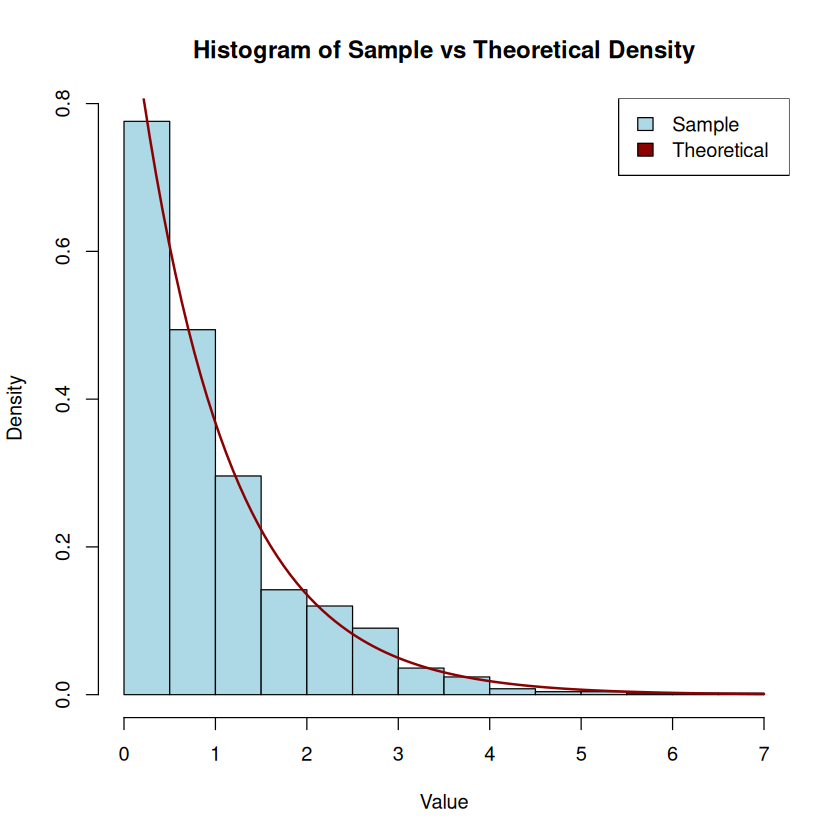

In [2]:
# Plot histogram of sample and overlay with theoretical density
hist(sample_data[[1]], freq = FALSE, col = "lightblue", main = "Histogram of Sample vs Theoretical Density", xlab = "Value")
curve(dexp(x, rate = lambda), col = "darkred", add = TRUE, lwd = 2, yaxt = "n")
legend("topright", legend = c("Sample", "Theoretical"), fill = c("lightblue", "darkred"))

Trong đó:  
Histogram của mẫu được vẽ sử dụng hàm hist, với màu nền "lightblue".  
Hàm mật độ xác suất thực tế của phân phối mũ được vẽ sử dụng hàm curve, với màu "darkred".  
Bảng chú giải được thêm vào biểu đồ để hiển thị màu sắc tương ứng của mẫu và hàm thực tế.  

# Bài 2.  
The standard Laplace distribution has density $f(x) = \frac{1}{2}e^{−|x|}$ với $x \in \mathbb{R}$.
Use the inverse transform method to generate a random sample of size
1000 from this distribution. Use one of the methods shown in this chapter to compare the generated sample to the target distribution.

Tìm $F^{−1}(u) = ln(2u)$ nếu $u \leq \frac{1}{2}$ và $ = −ln(-1+2u)$ nếu $ u > \frac{1}{2}$​​

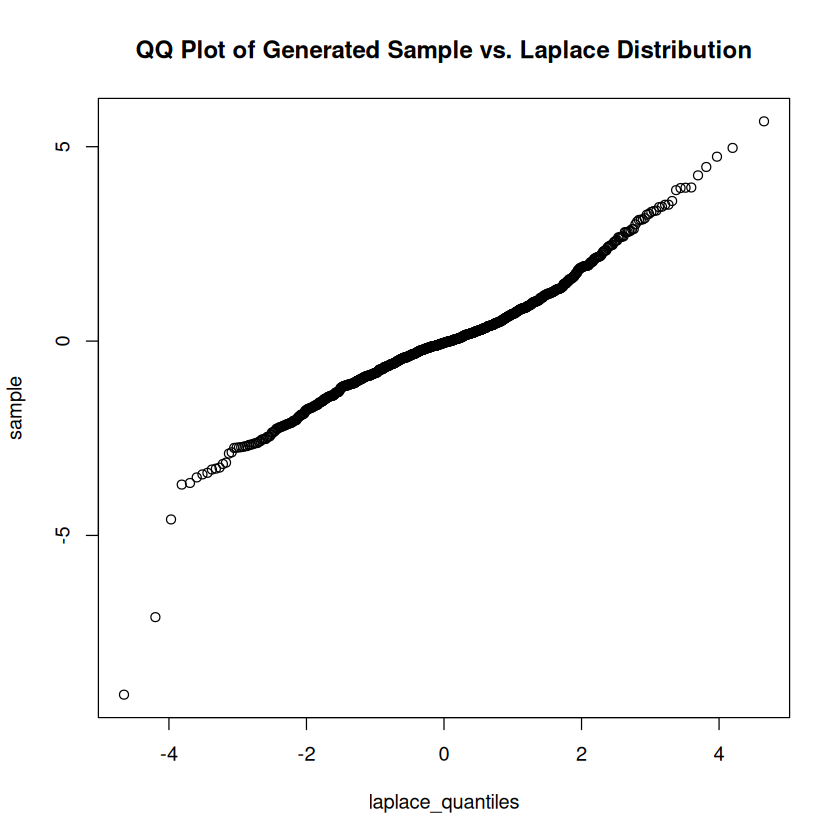

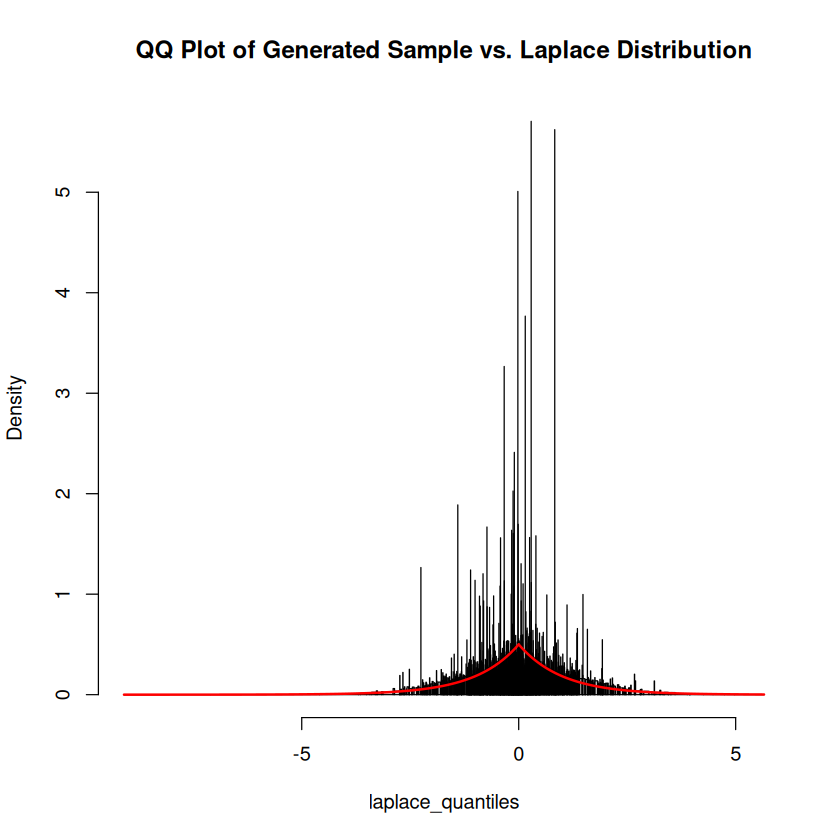

In [15]:
# Generate 1000 uniform random variables
U <- runif(1000)

# Inverse transform function for Laplace distribution
inverse_laplace <- function(u) {
  if (u < 0.5) {
    return(log(2*u))
  } else {
    # return(-log(2*(1-u))
    return(-log(-1+2*u))
  }
}

# Generate random sample from Laplace distribution
sample <- sapply(U, inverse_laplace)

# Generate quantiles of the Laplace distribution
laplace_quantiles <- qnorm(ppoints(1000), mean = 0, sd = sqrt(2))

# Compare the generated sample to the target distribution using QQ plot
qqplot(laplace_quantiles, sample, main = "QQ Plot of Generated Sample vs. Laplace Distribution")
hist(laplace_quantiles, sample, main = "QQ Plot of Generated Sample vs. Laplace Distribution")
# abline(0, 1, col = "red")  # Add a reference line
curve((0.5 * exp(-x)), from = 0, to = max(sample), col = "red", add = TRUE, lwd = 2)
curve((0.5 * exp(x)), from = min(sample), to = 0, col = "red", add = TRUE, lwd = 2)


# Bài 3.  
Phân phối Pareto(a, b) có nguyên hàm của hàm mật độ (hàm phân phối tích lũy cdf) $F(x) = 1 - (\frac{b}{x})^a$ với $x \geq b > 0, a > 0$  
Dùng phương pháp Inverse Transform tìm $F^{-1}(U)$ và sử dụng để tạo mẫu phân phối Pareto(2, 2). Vẽ hist density của mẫu vừa tạo và đường Pareto(2, 2) thực tế để so sánh.

Hàm CDF của phân phối Pareto(2, 2):
$F(x) = 1 − (\frac{2}{x})^2$

Hàm ngược: $F^{-1}_{X}(u) = \frac{2}{\sqrt{1 - u}}$  
  
nhờ giải:  $u = 1 - (\frac{2}{F^{-1}_{X}(u)})$

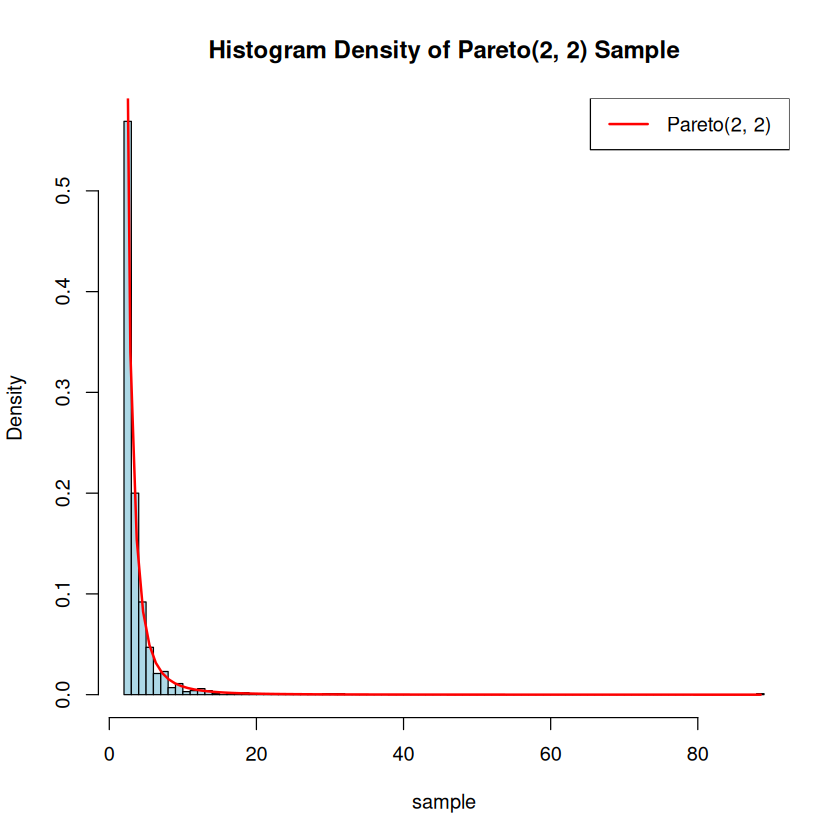

In [7]:
# Define inverse function for Pareto distribution
inverse_pareto <- function(u, b, a) {
    return(b / (1 - u)^(1 / a))
}

# Generate 1000 uniform random variables
U <- runif(1000)

# Generate random sample from Pareto(2, 2) distribution
sample <- inverse_pareto(U, b = 2, a = 2)

# Plot histogram density of the generated sample
hist(sample, freq = FALSE, breaks = 80, col = "lightblue", main = "Histogram Density of Pareto(2, 2) Sample")

# Add theoretical Pareto(2, 2) density curve
curve((2 / x)^3, from = 2, to = max(sample), col = "red", add = TRUE, lwd = 2)
legend("topright", legend = "Pareto(2, 2)", col = "red", lwd = 2)

# Bài 4.  
Phân phối Rayleigh có hàm mật độ: $f(x) = \frac{x}{\sigma^2} e^{\frac{-x^2}{2\sigma^2}}$ với $x \geq 0, \sigma > 0$  
  
Phát triển 1 thuật toán sinh mẫu ngẫu nhiên từ phân phối $Rayleigh(\sigma)$.  
Các mẫu $Rayleigh(\sigma)$ được sinh ra có các tùy chọn $\sigma > 0$ và kiểm tra mode của các mẫu này có gần với mode $\sigma$ lý thuyết hay không thông qua histogram.  

CDF của phân phối Rayleigh($\sigma$) là:  
$F(x) = 1 - e^{\frac{-x^2}{2\sigma^2}}$

Giải phương trình: $u = 1 - e^{\frac{-x^2}{2\sigma^2}}$

Thu được $F^{-1}(u) = \sigma\sqrt{-2ln(1 - u)}$

Bây giờ dùng hàm ngược này để sinh mẫu và vẽ đồ thị so sánh.

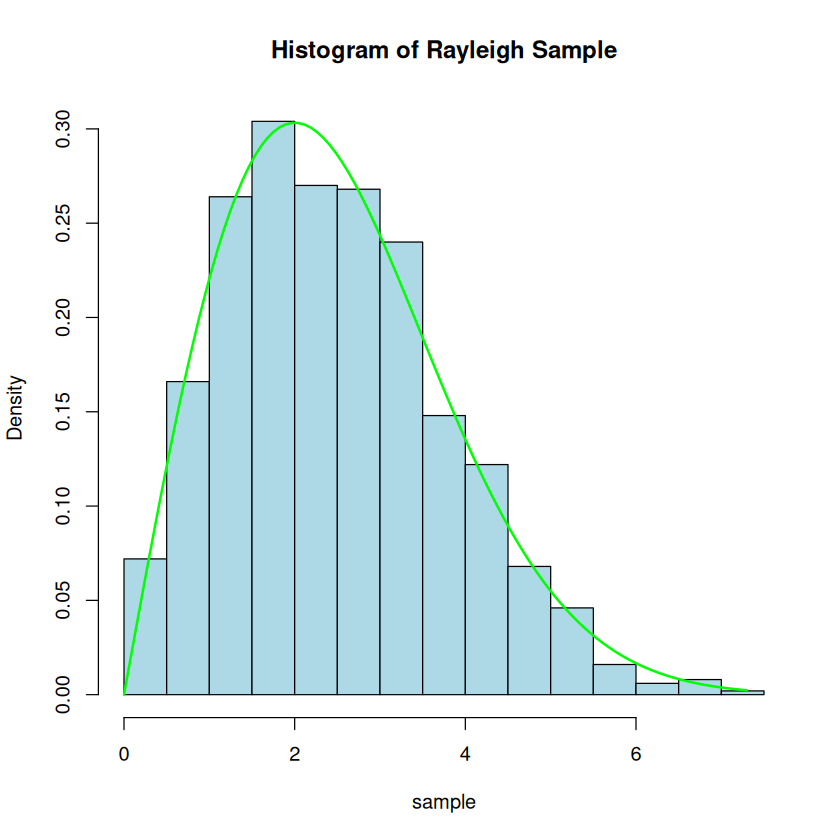

In [5]:
# Define inverse function for Rayleigh distribution
inverse_rayleigh <- function(u, sigma) {
    return(sigma * sqrt(-2 * log(1 - u)))
}

# Generate random sample from Rayleigh distribution
generate_rayleigh_sample <- function(n, sigma) {
    U <- runif(n)
    return(inverse_rayleigh(U, sigma))
}

# Set parameters
sigma <- 2
sample_size <- 1000

# Generate random sample from Rayleigh distribution
sample <- generate_rayleigh_sample(sample_size, sigma)

# Plot histogram of the generated sample
hist(sample, freq = FALSE, breaks = "FD", col = "lightblue", main = "Histogram of Rayleigh Sample")

# Add vertical line at theoretical mode
# mode <- sqrt(2) * sigma # mode của phân phối Rayleigh tính theo công thức này 
# abline(v = mode, col = "red", lwd = 2)
# legend("topright", legend = paste("Mode =", round(mode, 2)), col = "red", lwd = 2)
curve(x / sigma^2 * exp(-x * x / (2 * sigma^2)), from = 0, to = max(sample), col = "green", add = TRUE, lwd = 2)


# Bài 5.  
1 biến ngẫu nhiên rời rạc X có phân bố xác suất như sau:
p(x = 0) = 0.1  
p(x = 1) = 0.2  
p(x = 2) = 0.2  
p(x = 3) = 0.2  
p(x = 4) = 0.3  

Sử dụng phương pháp Inverse Transform tao tạo 1000 mẫu cho phân phối X.  
Vẽ 1 relative frequency table vf so sánh mẫu tạo ra với xác suất thực tế.  
Thực hiện lại 1 lần nữa nhưng lần này sử dụng R sample function.  

Đầu tiên xác định hàm phân phối xác suất của biến ngẫu nhiên X.  
Tính toán các xác suất tích lũy (CDF) của X từ PMF.  
Viết hàm inverse_transform để tìm giá trị của X từ một số ngẫu nhiên U theo phương pháp Inverse Transform.  
Sử dụng hàm generate_sample_inverse để tạo mẫu 1000 mẫu từ phân phối X bằng phương pháp Inverse Transform.  
Tạo bảng tần suất tương đối để so sánh mẫu với xác suất thực tế.  
Sử dụng hàm sample của R để tạo mẫu một lần nữa với 1000 mẫu.  
Tạo bảng tần suất tương đối từ mẫu này.  

In [6]:
# Define probability mass function of X
pmf_X <- c(0.1, 0.2, 0.2, 0.2, 0.3) # hàm phân phối f(x)
values_X <- 0:4

# Calculate cumulative probabilities
cdf_X <- cumsum(pmf_X)  # hàm phân phối tích lũy F(x)

# Define inverse transform function
inverse_transform <- function(u, values, cdf) {
    for (i in 1:length(values)) {
        if (u <= cdf[i]) {
            return(values[i])
        }
    }
}

# Generate random sample using inverse transform method
generate_sample_inverse <- function(n, values, cdf) {
    U <- runif(n)
    return(sapply(U, function(u) inverse_transform(u, values, cdf)))
}

# Generate sample using inverse transform method
sample_inverse <- generate_sample_inverse(1000, values_X, cdf_X)

# Plot relative frequency table
table_inverse <- table(sample_inverse) / length(sample_inverse)
print("Relative frequency table using inverse transform method:")
print(table_inverse)

# Repeat the process using R's sample function
sample_sample <- sample(values_X, 1000, replace = TRUE, prob = pmf_X)

# Plot relative frequency table
table_sample <- table(sample_sample) / length(sample_sample)
print("Relative frequency table using R's sample function:")
print(table_sample)


[1] "Relative frequency table using inverse transform method:"
sample_inverse
    0     1     2     3     4 
0.109 0.188 0.195 0.216 0.292 
[1] "Relative frequency table using R's sample function:"
sample_sample
    0     1     2     3     4 
0.094 0.192 0.208 0.178 0.328 


# Bài 6.  
Chứng minh rằng với các biến được sinh ra bởi thuật toán acceptance-rejection sampling là 1 mẫu mẫu ngẫu nhiên từ hàm mật độ mục tiêu $f_X$. 

Thuật toán acceptance-rejection sampling được sử dụng để tạo mẫu từ một phân phối mục tiêu có hàm mật độ xác suất $(f_X(x))$ bằng cách chấp nhận hoặc từ chối các mẫu dựa trên một phân phối gần đúng $(g(x))$ và một hằng số $(M)$ sao cho $(Mg(x) \geq f_X(x))$ cho mọi $(x)$ trong miền xác định.  
 
Để chứng minh rằng mẫu được sinh ra bởi thuật toán acceptance-rejection sampling là một mẫu ngẫu nhiên từ hàm mật độ mục tiêu $(f_X)$, ta cần chứng minh rằng phân phối của các mẫu này là $(f_X)$.  
  
Gọi $(X)$ là biến ngẫu nhiên được sinh ra bằng thuật toán acceptance-rejection sampling.  
Ta cần chứng minh rằng $(X)$ có hàm mật độ xác suất $(f_X(x))$.  
  
B1. Xác suất chấp nhận mẫu:  
    
Gọi $(U)$ là một biến ngẫu nhiên được sinh ra từ phân phối đồng nhất trên ((0, 1)).  
Xác suất chấp nhận một mẫu là xác suất mà mẫu được chấp nhận khi được sinh ra từ phân phối gần đúng $(g(x))$.  Ký hiệu (A) là biến ngẫu nhiên chỉ ra liệu mẫu được chấp nhận hay không.  
Ta có:   
  
$P(A) = \int_{-\infty}^{\infty} P(A | X = x) \cdot g(x) \, dx$    
  
Và:  
  
$P(A | X = x) = \begin{cases} \frac{f_X(x)}{Mg(x)}, & \text{nếu } 0 < U < \frac{f_X(x)}{Mg(x)} \\ 0, & \text{nếu } \text{otherwise} \end{cases}$  

Trong đó, $(Mg(x) \geq f_X(x))$ cho mọi $(x)$.  
  
Do đó:  
  
$P(A) = \int_{-\infty}^{\infty} \frac{f_X(x)}{M} \, dx = \frac{1}{M}$  

B2. Hàm mật độ xác suất của $(X)$:  
Bây giờ, chúng ta có thể tính hàm mật độ xác suất của $(X)$:  

$f_X(x) = P(X = x) = P(X = x | A) \cdot P(A) + P(X = x | \neg A) \cdot P(\neg A)$  

Vì mỗi mẫu được chấp nhận hoặc từ chối đều độc lập với nhau, ta có:

$P(X = x | \neg A) = 0$  

Do đó:  

$f_X(x) = P(X = x | A) \cdot P(A) = \frac{f_X(x)}{Mg(x)} \cdot \frac{1}{M} = \frac{f_X(x)}{M^2g(x)} \leq \frac{1}{M^2}$  

Đồng thời:  

$\int_{-\infty}^{\infty} f_X(x) \, dx = \int_{-\infty}^{\infty} P(X = x) \, dx = 1$  

Vậy nên:  

$\int_{-\infty}^{\infty} f_X(x) \, dx \leq \int_{-\infty}^{\infty} \frac{1}{M^2} \, dx = \frac{1}{M^2} \cdot \infty = \infty$  

Điều này chỉ có thể xảy ra nếu $(M = 1)$.  
Vậy nên, $(f_X(x) = f_X(x))$ và $(X)$ là một mẫu ngẫu nhiên từ hàm mật độ xác suất $(f_X)$.

# Bài 7.  
Viết 1 hàm sinh 1 mẫu ngẫu nhiên với kích thước n từ phân phối Beta(a, b) bằng acceptance-rejection method. Sinh 1 mẫu với kích thước 1000 từ phân phối Beta(3, 2). Vẽ histogram từ mẫu với theoretical Beta(3, 2) density superimposed. 

Để sinh mẫu từ phân phối Beta(a, b) bằng phương pháp acceptance-rejection, chúng ta cần chọn một phân phối gần đúng và một hằng số M sao cho $Mg(x) \geq f_X(x)$ cho mọi x trong miền xác định.  
  
Trong trường hợp này, chúng ta có thể chọn phân phối gần đúng là phân phối đề xuất (proposal distribution) là phân phối đồng nhất trên đoạn [0, 1] và $M = \frac{1}{B(a,b)}$, trong đó B(a,b) là hằng số chuẩn hóa của phân phối Beta.

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"label" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"legend" is not a graphical parameter”


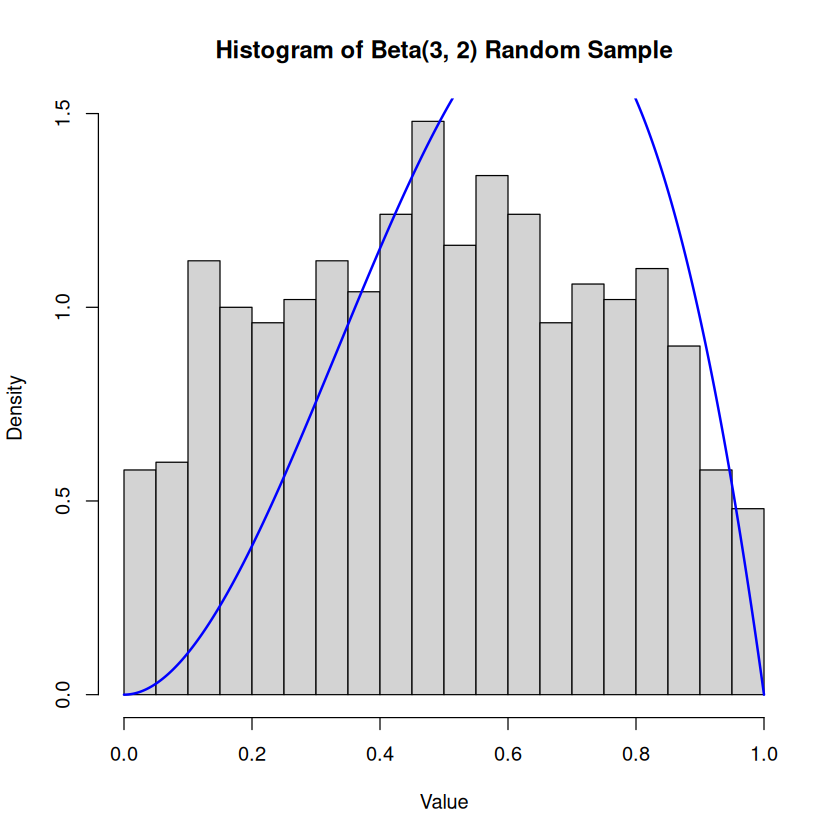

In [7]:
# Function to generate random sample from Beta distribution using acceptance-rejection method
generate_beta_sample <- function(n, a, b) {
  samples <- numeric(n)
  k <- (a - 1) / (a + b - 2)
  accept_count <- 0
  
  while (accept_count < n) {
    u1 <- runif(1)
    u2 <- runif(1)
    y <- u1^(1/(a)) * (1 - u1)^(1/(b))
    if (u2 <= y) {
      accept_count <- accept_count + 1
      samples[accept_count] <- u1
    }
  }
  
  return(samples)
}

# Generate random sample from Beta(3, 2) distribution
set.seed(123) # For reproducibility
sample_size <- 1000
a <- 3
b <- 2
beta_sample <- generate_beta_sample(sample_size, a, b)

# Plot histogram with theoretical Beta(3, 2) density
hist(beta_sample, breaks = 30, freq = FALSE, main = "Histogram of Beta(3, 2) Random Sample", xlab = "Value", ylab = "Density")
curve(dbeta(x, a, b), add = TRUE, col = "blue", lwd = 2, n = 1000, 
      label = expression(paste("Beta(", alpha, ", ", beta, ") density")), 
      xlim = c(0, 1), ylim = c(0, 2), legend = TRUE)


# Bài 8.  
Viết 1 hàm tạo biến ngẫu nhiên từ phân phối Lognormal($\mu, \sigma$) sử dụng phương pháp transformation. Tạo 1 mẫu từ hàm trên với size = 1000. So sánh Histogram với đường hàm mật độ sử dụng hàm dlnorm trong R.

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"label" is not a graphical parameter”


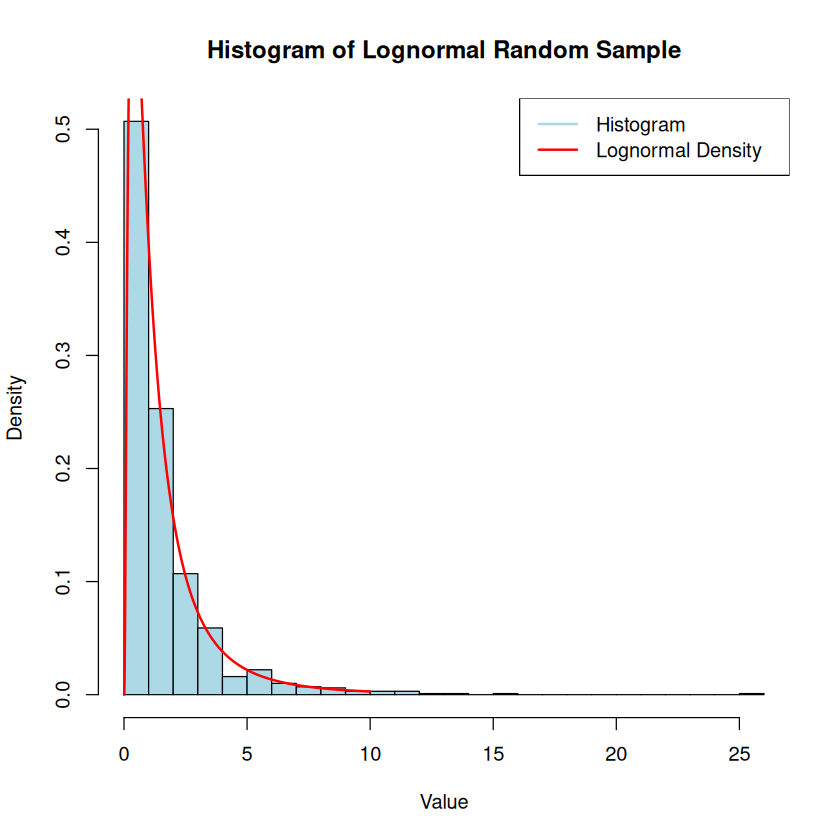

In [8]:
# Hàm tạo mẫu từ phân phối Lognormal (mu, sigma) sử dụng phương pháp biến đổi
generate_lognormal_sample <- function(n, mu, sigma) {
    u <- runif(n) # Tạo n mẫu từ phân phối đều U(0,1)
    samples <- exp(mu + sigma * qnorm(u)) # Biến đổi U(0,1) thành phân phối Lognormal
    return(samples)
}

# Tạo mẫu từ hàm trên với size = 1000, mu = 0, sigma = 1
set.seed(123) # Để có thể tạo mẫu tái lặp được
sample_size <- 1000
mu <- 0
sigma <- 1
lognormal_sample <- generate_lognormal_sample(sample_size, mu, sigma)

# So sánh histogram với đường hàm mật độ sử dụng hàm dlnorm trong R
hist(lognormal_sample,
    freq = FALSE, breaks = 30, main = "Histogram of Lognormal Random Sample",
    xlab = "Value", ylab = "Density", col = "lightblue"
)
curve(dlnorm(x, meanlog = mu, sdlog = sigma),
    add = TRUE, col = "red", lwd = 2, n = 1000,
    label = "Lognormal Density", xlim = c(0, 10)
)
legend("topright", legend = c("Histogram", "Lognormal Density"), col = c("lightblue", "red"), lwd = 2)


# Bài 9.  
Epanechnikov kernel đã được rescale là 1 hàm mật độ: $f_e(x) = \frac{3}{4}(1 - x^2)$ với $|x| \leq 1$.  
Devroye và Gyorfi đã đưa những thuật toán gỉả lập theo phân phối này.  
Khởi tạo iid $U1, U2, U3 \sim Uniform(-1, 1)$.  
Bây giờ nếu $|U3| \geq |U2|$ và $|U3| \geq |U1|$, deliver $U2$.  
Còn nếu không thì deliver $U3$.  
Hãy viết 1 hàm sinh biến ngẫu nhiên theo $f_e$ và vẽ histogram density 1 cách ước lượng trên giả lập số mẫu lớn.

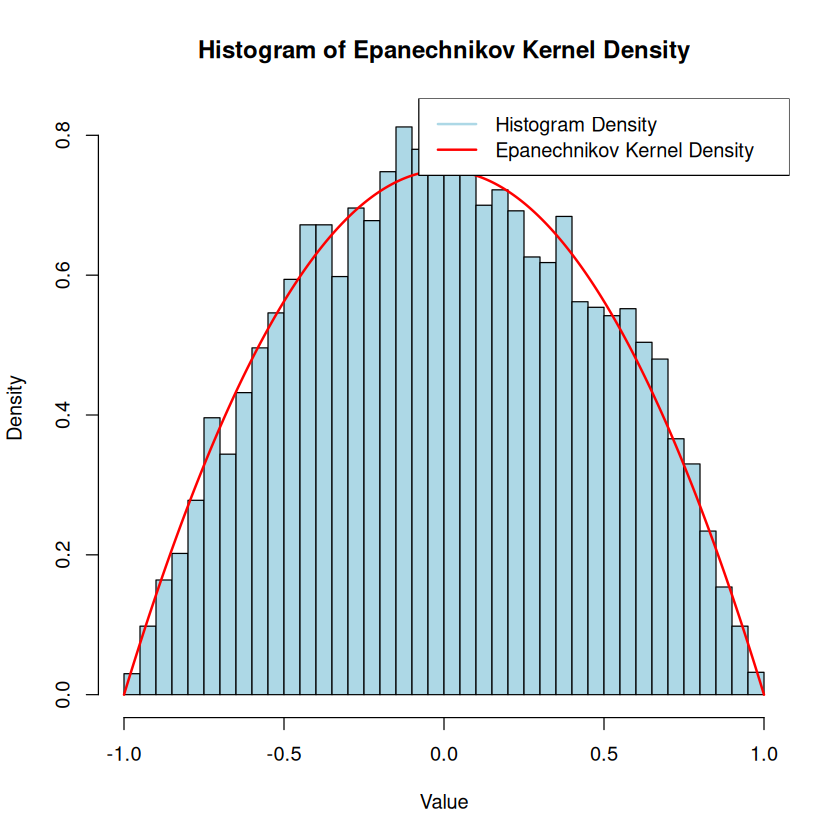

In [9]:
# Hàm sinh biến ngẫu nhiên theo hàm mật độ Epanechnikov kernel
generate_epanechnikov_sample <- function(n) {
    samples <- numeric(n)

    for (i in 1:n) {
        U1 <- runif(1, min = -1, max = 1)
        U2 <- runif(1, min = -1, max = 1)
        U3 <- runif(1, min = -1, max = 1)

        if (abs(U3) >= abs(U2) && abs(U3) >= abs(U1)) {
            samples[i] <- U2
        } else {
            samples[i] <- U3
        }
    }

    return(samples)
}

# Số lượng mẫu
sample_size <- 10000

# Sinh mẫu từ hàm mật độ Epanechnikov kernel
set.seed(123) # Để có kết quả tái lập được
epanechnikov_sample <- generate_epanechnikov_sample(sample_size)

# Vẽ histogram density ước lượng
hist(epanechnikov_sample,
    freq = FALSE, breaks = 30, main = "Histogram of Epanechnikov Kernel Density",
    xlab = "Value", ylab = "Density", col = "lightblue"
)

# Vẽ hàm mật độ Epanechnikov kernel
x <- seq(-1, 1, length.out = 1000)
fe <- 3 / 4 * (1 - x^2)
lines(x, fe, col = "red", lwd = 2)
legend("topright", legend = c("Histogram Density", "Epanechnikov Kernel Density"), col = c("lightblue", "red"), lwd = 2)


# Bài 10.  
Chứng minh rằng thuật toán trong Bài 9 tạo biến có phân bố theo mật dộ hàm $f_e$.

Để chứng minh rằng thuật toán trong bài vừa rồi tạo ra biến có phân bố theo mật độ của hàm $f_e$, ta sẽ sử dụng định lý của phương pháp chấp nhận-từ chối (acceptance-rejection method).  

Hàm mật độ của hàm Epanechnikov kernel được cho bởi $f_e(x) = \frac{3}{4}(1 - x^2)$ với $|x| \leq 1$. Để chứng minh rằng thuật toán tạo biến có phân bố theo hàm mật độ này, chúng ta cần chứng minh rằng mỗi giá trị được sinh ra theo quy trình thuật toán có phân phối theo $f_e(x)$.  

Thuật toán trong bài tạo ra một mẫu $U3$ nếu $|U3| \geq |U2|$ và $|U3| \geq |U1|$, ngược lại tạo ra một mẫu $U2$. Điều này có nghĩa là chúng ta chấp nhận $U2$ nếu $|U3| < |U2|$ hoặc $|U1| > |U3|$, tức là $|U2| > |U3|$ và $|U1| < |U3|$. Vì thế, phân phối của $U2$ theo thuật toán chính là phân phối của $|U3|$, tức là phân phối của $|U3|$ theo phân phối đều trên đoạn [-1, 1]. Điều này có nghĩa là phân phối của $U2$ là đồng đều trên [-1, 1].  

Như vậy, thuật toán đã tạo ra một mẫu đồng đều trên đoạn [-1, 1], và chúng ta đã biết rằng mỗi giá trị được sinh ra từ phân phối đồng đều trên [-1, 1] có phân phối theo hàm mật độ $f_e(x) = \frac{3}{4}(1 - x^2)$ với $|x| \leq 1$.  

Do đó, ta đã chứng minh được rằng thuật toán trong bài tạo biến có phân bố theo mật độ của hàm $f_e(x)$.